In [9]:
import numpy as np
import matplotlib.pyplot as plt

## 1．搭建并可视化环境

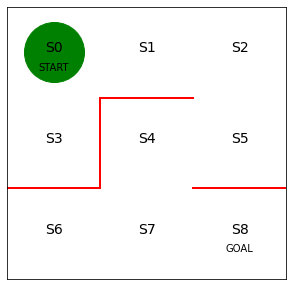

In [10]:
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)

plt.plot([2, 3], [1, 1], color='red', linewidth=2)#[2,3]都表示x坐标点，[1,1]y坐标点
plt.plot([0, 1], [1, 1], color='red', linewidth=2)
plt.plot([1, 1], [1, 2], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)

plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

plt.tick_params(axis='both', which='both',
                bottom=False, top=False,
                right=False, left=False,
                labelbottom=False, labelleft=False
                ) #去坐标轴刻度

line, = ax.plot([0.5], [2.5], marker='o', color='g', markersize=60)

## 2．MDP框架

- 五大元素：$S，A，P，R，\gamma$
    
    - $S$ 为有限的状态集
    - $A$ 为有限的动作集
    - $P$ 为状态转移概率
    - $R$ 为回报函数
    - $\gamma$ 为折扣因子，用来计算累积回报

- 框架 
<div >
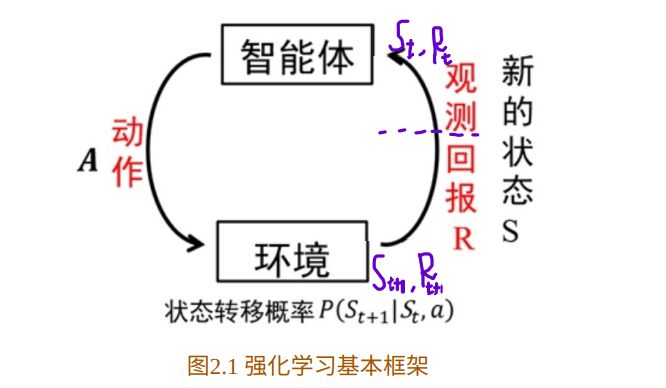
</div>

### 状态空间S：

In [11]:
# 状态0~8
states = np.arange(9)
states

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

### 动作空间 A：

In [12]:
# 动作0、1、2、3,分别表示向上、向右、向下、向左
actions = np.arange(4)
actions

array([0, 1, 2, 3])

### 奖励R：

In [13]:
# 奖励
rewards = 0 * np.ones(9)
rewards[8] = 1
rewards

array([0., 0., 0., 0., 0., 0., 0., 0., 1.])

### 折扣因子：

In [14]:
# 奖励折扣因子
gamma = 0.9

### 状态动作转移关系：

In [15]:
# 定义状态动作转移，传入当前状态和执行的动作，返回当前状态下执行动作得到的转移概率、下一状态和奖励
def p_state_reward(state, action):
    # 向上移动
    if action == 0:

        # 状态0,1,2选择向上移动会保持当前状态不变
        if state in range(3):
            return ((1, state, 0))

        # 状态4,6,8选择向上移动会保持当前状态不变
        if state in range(4, 9, 2):
            return ((1, state, 0))
        # 其它状态选择向上动作以概率1转移到下一状态
        else:
            return ((1, state - 3, 0))

    # 向下移动
    if action == 2:

        # 状态5,6,7,8选择向下移动会保持当前状态不变
        if state in range(5, 9):
            return ((1, state, 0))

        # 状态1,3选择向下移动会保持当前状态不变
        if state in range(1, 4, 2):
            return ((1, state, 0))

        # 其它状态选择向下动作以概率1转移到下一状态
        else:
            return ((1, state + 3, 0))

            # 向左移动
    if action == 3:

        # 状态0,3,6选择向左移动会保持当前状态不变
        if state in np.arange(0, 9, 3):
            return ((1, state, 0))
        # 状态4选择向左移动会保持当前状态不变
        if state ==4 :
            return ((1, state, 0))

        # 其它状态选择向下动作以概率1转移到下一状态
        else:
            return ((1, state - 1, 0))

            # 向右移动
    if action == 1:

        # 状态2,5,8选择向右动作会离开棋盘
        if state in np.arange(2, 9, 3):
            return ((1, state, 0))

        # 状态3选择向右动作会离开棋盘
        if state == 3:
            return ((1, state, 0))
        # 状态7选择向右动作会转移到终止状态8
        if state == 7:
            return ((1, 8, 1))

        # 其它状态选择向右动作以概率1转移到下一状态
        else:
            return ((1, state + 1, 0))

## 3．使用策略迭代进行求解

- 策略迭代：先等所有状态价值函数收敛后，再基于当前状态价值选取策略，进行策略改善


- 值迭代：评估一次值函数后，立即选取当前状态下的最优策略，进行改善，如此循环迭代(一次值评估，策略改善；第二次值评估，策略改善...)

- 策略迭代流程
<div >
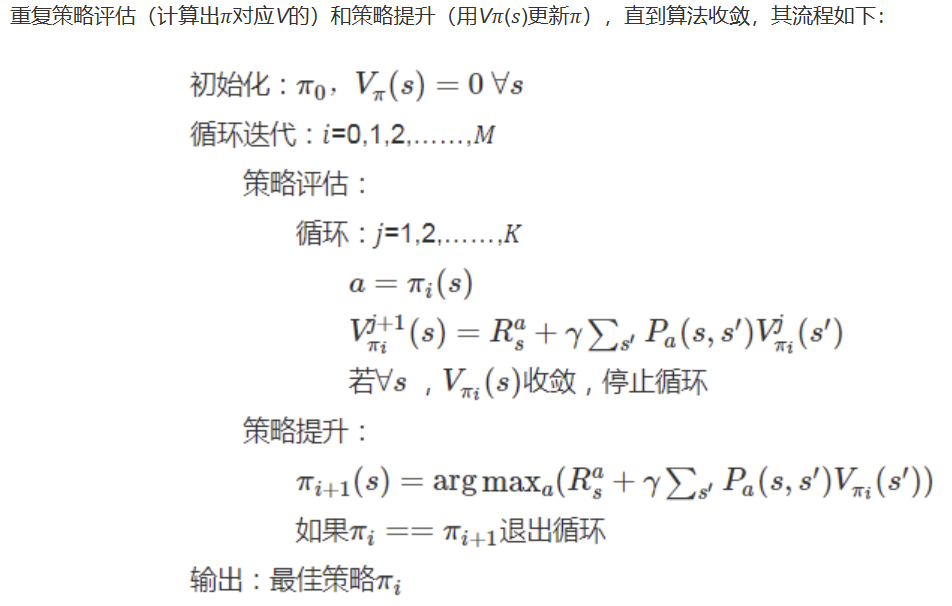
</div>

- 值迭代流程
<div >
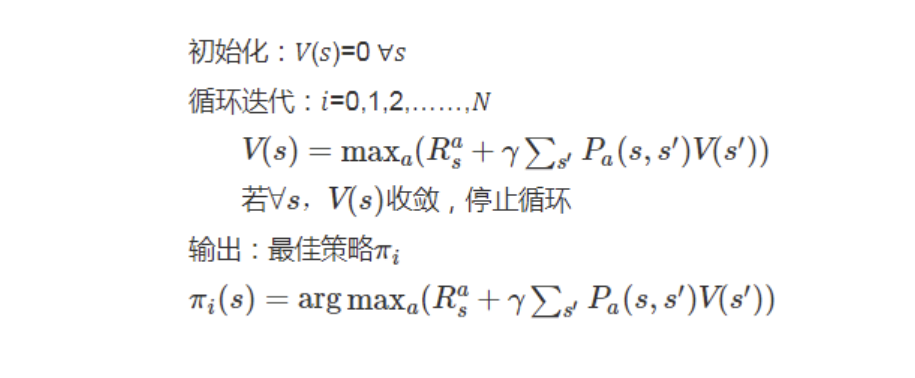
</div>

- 状态价值函数贝尔曼方程
<div >
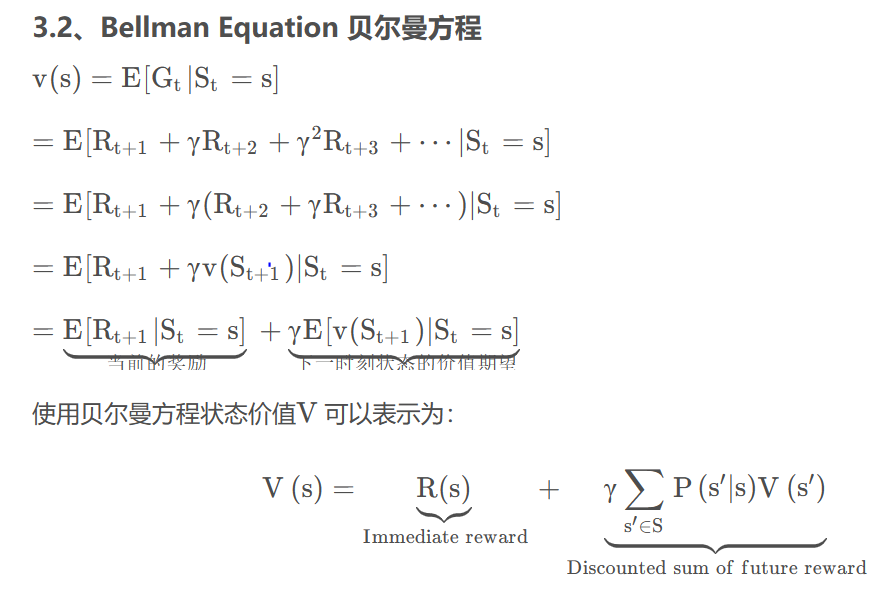
</div>
$v_{k+1}(s)=R_s^a+\gamma \sum_{s'\in S}P(s'_{t+1}|s_t)^av_k(s')$


- 动作价值函数贝尔曼方程
<div >
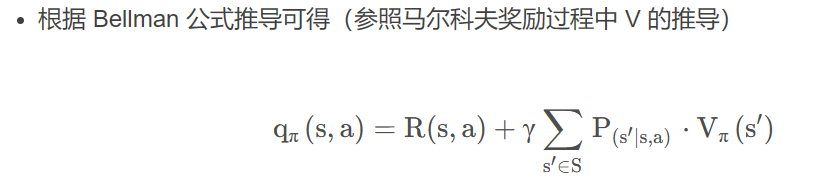
</div>


- 状态价值函数与动作价值函数关系
<div >
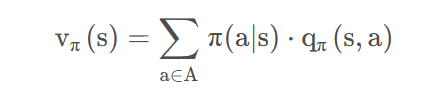
</div>

<div >
<img src="" width="400"/>
</div>
$$V_*(s)=\max_\pi V_\pi(s)$$

$$q_*(s,a)=\max_\pi q_\pi(s,a)$$


$$\pi^*(a|s)=\begin{cases}1,\quad \rm if\quad a = \arg \max q_*(s,a)\\
0,\quad \rm otherwise\\
\end{cases}$$

$$
V_*(s)=\rm max_a q_*(s,a) * 1 + \rm otherwise * 0=\max_a q_*(s,a)$$



In [16]:
# 随机初始化一个策略，全部向下
random_policy = 2 *np.ones(len(states)) #np.ones产生的元素为1
random_policy

array([2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [17]:
# 设置迭代次数
n = 10

### 3.1 策略评估 

In [18]:
# 策略评估：计算策略下状态的价值
def compute_value_function(policy, gamma):
    ##  设置阈值
    threshold = 1e-10

    # 初始化每个状态的价值
    value_table = np.zeros(len(states))

    while True:
        # 创建每次迭代更新的状态价值表
        update_value_table = np.copy(value_table)

        ## 遍历所有状态
        for state in states:
            ## 选择当前策略下当前状态所对应的动作
            action = policy[state]  #开始的policy即初始化的random_policy

            ## 返回当前状态下执行动作得到的转移概率、下一状态和奖励
            trans_prob, next_state, reward = p_state_reward(state, action)

            ## 计算策略下状态价值
            value_table[state] = reward + gamma * trans_prob * update_value_table[next_state] #该式子最终会收敛
          

        ## 价值表前后两次更新之差小于阈值时停止循环
        if np.sum((np.fabs(update_value_table - value_table))) <= threshold:
            break
    return value_table

### 3.2 策略改善 

In [19]:
# 策略提升：更新策略
def next_best_policy(value_table, gamma):
    ## 创建空数组保存改进的策略
    policy = np.zeros(len(states))

    for state in states:
        ## 创建列表存储当前状态下执行不同动作的价值
        action_table = np.zeros(len(actions)) 

        ## 遍历所有动作
        for action in actions:
            ## 返回当前状态-动作下一步的状态、转移概率和奖励
            trans_prob, next_state, reward = p_state_reward(state, action)

            ## 计算当前状态下执行当前动作的价值 
            action_table[action] = reward + gamma * trans_prob * value_table[next_state]

        ## 策略提升：选取动作值最大的动作更新策略
        policy[state] = np.argmax(action_table)

    return policy

### 3.3 策略迭代 

In [20]:
# 建立策略迭代函数
def policy_iteration(random_policy, gamma, n):
    ## 进行迭代
    for i in range(n):

        ## 策略评估：得到各状态的价值
        new_value_function = compute_value_function(random_policy, gamma)

        ## 策略提升：选取动作值最大的动作更新策略
        new_policy = next_best_policy(new_value_function, gamma)

        ## 对当前策略进行判断
        if np.all(random_policy == new_policy):
            print('策略迭代结束，迭代次数为%d' % (i + 1))
            break

        ## 替换为当前最佳策略
        random_policy = new_policy

    return new_policy

### 策略迭代实例运用

In [21]:
best_policy = policy_iteration(random_policy, gamma, n)
print(best_policy)

策略迭代结束，迭代次数为7
[1. 1. 2. 0. 2. 3. 1. 1. 3.]


In [22]:
# 创建最佳路线列表，起始位置一定在状态0
best_route = [0]
next_state = 0
while True:

    # 通过最佳策略求解当前状态下执行最优动作所转移到的下一个状态
    _, next_state, _ = p_state_reward(next_state, best_policy[next_state])

    # 将下个状态加入最佳路线列表
    best_route.append(next_state)

    # 转移到终止状态，停止循环
    if next_state == 8:
        break

print('最佳路线：', best_route)

最佳路线： [0, 1, 2, 5, 4, 7, 8]


## 4．结果可视化 

In [23]:
from matplotlib import animation
from IPython.display import HTML

In [24]:
def init():
    line.set_data([], [])
    return (line, )
def animate(i):
    state = best_route[i]
    x = (state % 3)+0.5 #状态依据x取格子中心
    y = 2.5 - int(state/3)
    line.set_data(x, y)

In [25]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(best_route), interval=200, repeat=False)

In [26]:
HTML(anim.to_jshtml())